In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split,cross_val_score,LeaveOneOut,KFold,cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.pipeline import make_pipeline

In [19]:
df = pd.read_csv("./dataset/full_preprocessed_titanic.csv")
df.head(5)

,age,fare,family_size,sibsp,parch,fare_per_person,embarked_C,embarked_Q,embarked_S,pclass_1.0,...,deck_D,deck_E,deck_F,deck_G,age_group_Adult,age_group_Child,age_group_Teen,sex,is_alone,survived
0,0.375000,0.014151,0.1,0.125,0.0,0.007076,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,0,0.0
1,0.682692,0.139136,0.1,0.125,0.0,0.069568,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1.0
2,0.451923,0.015469,0.0,0.000,0.0,0.015469,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,1,1.0
3,0.625000,0.103644,0.1,0.125,0.0,0.051822,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,1.0
4,0.625000,0.015713,0.0,0.000,0.0,0.015713,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1,1,0.0


In [20]:
X = df.drop(['survived'],axis=1)
y = df['survived']

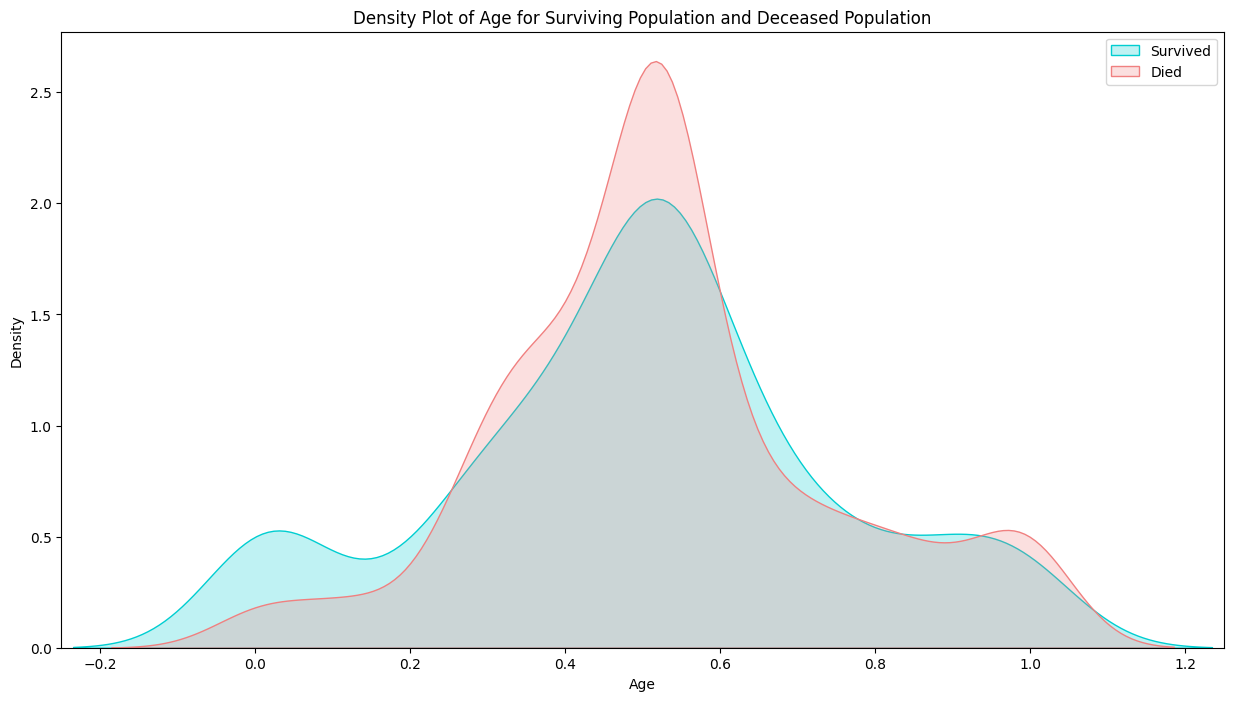

In [28]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(df["age"][df.survived == 1], color="darkturquoise", fill=True)
sns.kdeplot(df["age"][df.survived == 0], color="lightcoral", fill=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-0.25,1.25)
plt.show()

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

print(f'shape of train feature set:{X_train.shape}\t\tshape of train target set:{y_train.shape}\n')
print(f'shape of test feature set:{X_test.shape}\t\tshape of test target set:{y_test.shape}\n')

shape of train feature set:(712, 27)		shape of train target set:(712,)

shape of test feature set:(179, 27)		shape of test target set:(179,)



In [65]:
acc = []


model = LogisticRegression(C=0.1,max_iter=5000)
cv = KFold(n_splits=5, random_state=42, shuffle=True)

scoring = ['accuracy', 'precision', 'recall', 'f1']
cv_results = cross_validate(model, X_train, y_train, cv=cv, scoring=scoring)

# Calculate average cross-validation scores
average_scores = {metric: np.mean(cv_results[f'test_{metric}']) for metric in scoring}

In [66]:
print("Average Cross-Validation Metrics:")
print(f"Accuracy: {average_scores['accuracy']:.2f}")
print(f"Precision: {average_scores['precision']:.2f}")
print(f"Recall: {average_scores['recall']:.2f}")
print(f"F1 Score: {average_scores['f1']:.2f}")

Average Cross-Validation Metrics:
Accuracy: 0.81
Precision: 0.83
Recall: 0.64
F1 Score: 0.72


In [67]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

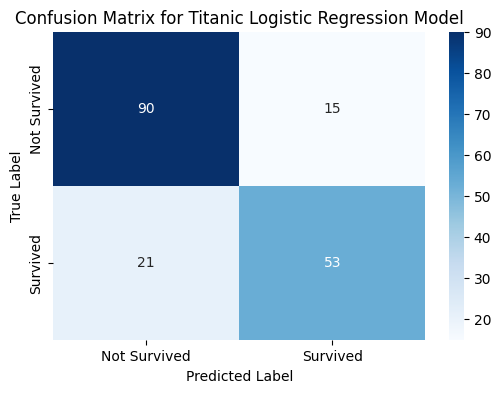

In [68]:
# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix for Titanic Logistic Regression Model")
plt.show()

In [69]:
# Calculate evaluation metrics for test dataset
test_accuracy = accuracy_score(y_test, y_pred)
test_precision = precision_score(y_test, y_pred)
test_recall = recall_score(y_test, y_pred)
test_f1 = f1_score(y_test, y_pred)

In [70]:
print("Test Dataset Evaluation Metrics:")
print(f"Accuracy: {test_accuracy:.2f}")
print(f"Precision: {test_precision:.2f}")
print(f"Recall: {test_recall:.2f}")
print(f"F1 Score: {test_f1:.2f}")

Test Dataset Evaluation Metrics:
Accuracy: 0.80
Precision: 0.78
Recall: 0.72
F1 Score: 0.75
